# Analyzing Star Wars Survey data

In this project, we'll be working with and analyzing data on the Star Wars movies.

The data is obtained by FiveThirtyEight team surveying Star Wars fans using the online tool SurveyMonkey. We have 835 total responses, which can be downloaded from the [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we try to answer the question, "Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the data

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## Cleaning and Exploring the data

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

There are several columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First of all, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid RespondentID.

### Removing rows where RespondentID is null

In [6]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [7]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

### Converting second and third columns to Boolean type

By taking a look at the next two columns, which are:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. 

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. 

We can use the pandas.Series.map() method on series objects to perform the conversion.

In [8]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
# dictionary to define a mapping from each value in series to a new value
yes_no = {"Yes" : True, "No" : False}

In [11]:
#Applying the map to second and third columns
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [12]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Simplifying columns 4 to 10 

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier.

In [14]:
seen1_or_not = {"Star Wars: Episode I  The Phantom Menace": True, np.NaN: False}
seen2_or_not = {"Star Wars: Episode II  Attack of the Clones": True, np.NaN: False}
seen3_or_not = {"Star Wars: Episode III  Revenge of the Sith": True, np.NaN: False}
seen4_or_not = {"Star Wars: Episode IV  A New Hope": True, np.NaN: False}
seen5_or_not = {"Star Wars: Episode V The Empire Strikes Back": True, np.NaN: False}
seen6_or_not = {"Star Wars: Episode VI Return of the Jedi": True, np.NaN: False}

In [15]:
star_wars['Unnamed: 4'].value_counts(dropna = False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

In [16]:
cols = star_wars.columns[3:9]
s = [seen1_or_not, seen2_or_not, seen3_or_not, seen4_or_not, seen5_or_not, seen6_or_not]
i = 0
for c in cols:
    star_wars[c] = star_wars[c].map(s[i])
    i+= 1
    star_wars = star_wars.rename(columns = {c:"seen_{}".format(i)})

In [17]:
star_wars['seen_1'].value_counts(dropna = False)
star_wars['seen_2'].value_counts(dropna = False)

False    615
True     571
Name: seen_2, dtype: int64

In [18]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

### SImplifying ranking columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [20]:
r = 1
for c in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns = {c:"ranking_{}".format(r)})
    r = r+1
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

### Plotting the rankings to find the highest ranked movie 

In [22]:
m_series = star_wars[star_wars.columns[9:15]].mean()
m_series

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

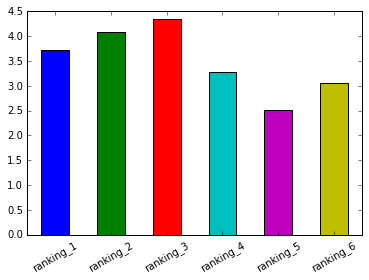

In [23]:
%matplotlib inline
m_series.plot.bar(rot = 30)

The following observations can be made from the bar chart


1. Star Wars: Episode III  Revenge of the Sith ranked lowest in terms of average ratings 
2. Star Wars: Episode V The Empire Strikes Back ranks the highest 
3. The last three 3 movies are more popular than the first three

In [25]:
# compute the sum of each of the seen columns.
total_seen = star_wars[star_wars.columns[3:9]].sum()
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

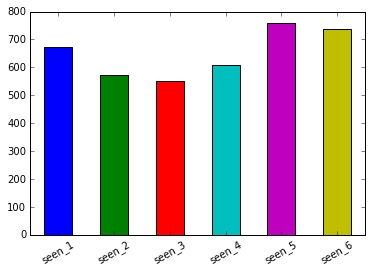

In [26]:
total_seen.plot.bar(rot = 30)

From the above bar chart, it can be seen that

1. As, expected, Star Wars: Episode V The Empire Strikes Back is the movie that is watched by highest number of people
2. Star Wars: Episode III Revenge of the Sith had been watched by lowest number of people among respondents nad the lowest rating
3. The last three movies were watched by more number of people than the first three

## Gender based analysis of ratings

- Split the data into two groups based on Gender column.
- Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.

In [27]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

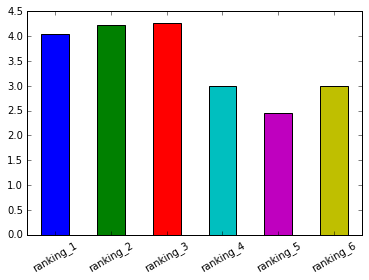

In [28]:
m_mean_rating = males[males.columns[9:15]].mean()
m_mean_rating.plot.bar(rot = 30)

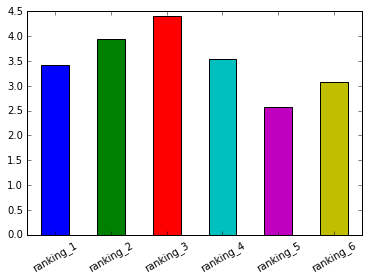

In [29]:
f_mean_rating = females[females.columns[9:15]].mean()
f_mean_rating.plot.bar(rot = 30)

The average ratings of male and female groups follow the same pattern as the whole.


However, the first two movies are more popular among females than males

In [45]:
m_total_seen = males[males.columns[3:9]].sum()
f_total_seen = females[females.columns[3:9]].sum()

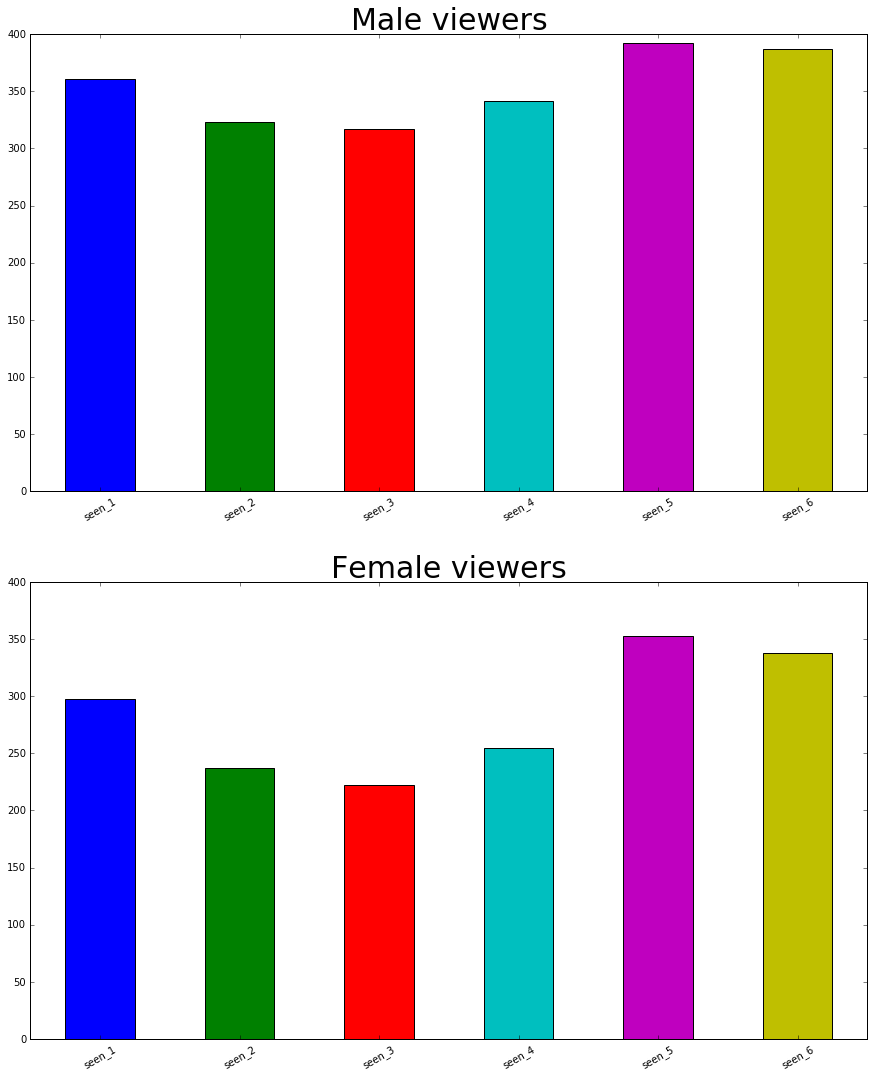

In [46]:
fig = plt.figure(figsize = (15,18))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

plt.subplot(2,1,1)
#This will create the bar graph for poulation
male = m_total_seen.plot.bar(rot = 30)
plt.title('Male viewers', fontsize=30)

#The below code will create the second plot.
plt.subplot(2,1,2)

female =f_total_seen.plot.bar(rot = 30)
plt.title('Female viewers', fontsize=30)
plt.show()

Again, the total number of males and females who watched the movies follow the same patter as the whole. 

But the number of female viewers for each of the movies is lesser than the number of male viewers

### Education based analysis of ratings 

In [26]:
star_wars["Education"].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

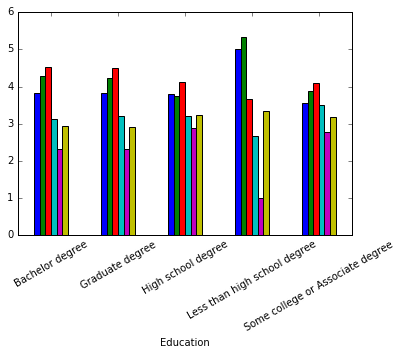

In [47]:
ratings_by_edu = star_wars.groupby("Education")[star_wars.columns[9:15]].agg(np.mean)
ratings_by_edu
ratings_by_edu.plot.bar(legend = False, rot = 30)

The ratings of movies segmented by Educational background of respondents follow the same pattern as the whole.

The level of ratings for each of the movies for all educational backgrounds is almost the same except for the group with 'Less than  high school degree'

The ratings of the first three movies of 'high school' and 'less than high school degree' groups do not follow the general pattern

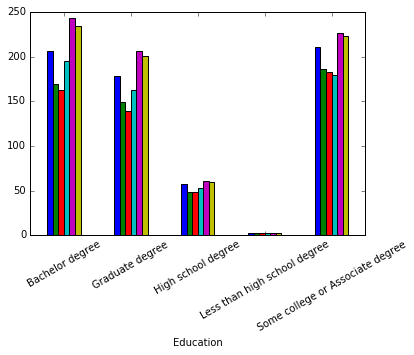

In [49]:
seen_by_edu = star_wars.groupby("Education")[star_wars.columns[3:9]].agg(np.sum)
seen_by_edu
seen_by_edu.plot.bar(legend = False, rot = 30)

The above graph shows that the number of participants from the educational background 'Less than high school degree' and 'High school degree' who have seen the movies are comparatively much smaller compared to other groups.

This shows the lack of popularity of star wars movies among these groups. And also, Star Wars is most watched by people with a bacheoler degree and above.

## Finding the most liked and disliked characters

In [32]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [35]:
star_wars_1 = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
character_names = star_wars_1.loc[0,star_wars.columns[15:29]] 

In [36]:
character_names

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.                Han Solo
Unnamed: 16                                                                                                             Luke Skywalker
Unnamed: 17                                                                                                       Princess Leia Organa
Unnamed: 18                                                                                                           Anakin Skywalker
Unnamed: 19                                                                                                             Obi Wan Kenobi
Unnamed: 20                                                                                                          Emperor Palpatine
Unnamed: 21                                                                                                                Darth Vader
Unnamed: 22                                            

In [39]:
i = 0
for c in character_names:
    star_wars = star_wars.rename(columns = {character_names.index[i] : c})
    i = i+1 
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [40]:
star_wars["Luke Skywalker"].value_counts()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64

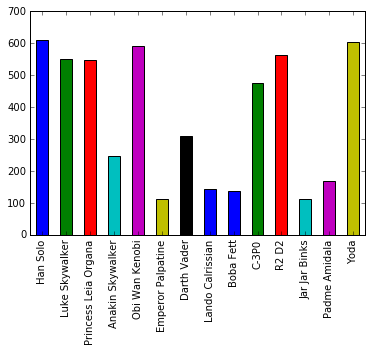

In [44]:
most_liked_character = (star_wars[star_wars.columns[15:29]] == "Very favorably").sum()
most_liked_character.plot.bar()

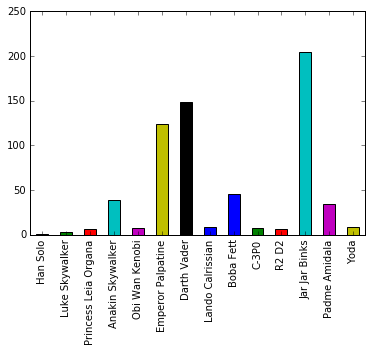

In [45]:
most_disliked_character = (star_wars[star_wars.columns[15:29]] == "Very unfavorably").sum()
most_disliked_character.plot.bar()

Han Solo is the most liked character with around 600+ respondents liking the character most favorably. Obi Van Kenboi and Yoda give close competition to Han Solo

Jar Jar Binks is the most disliked character viewed most unfavorably by more than 200 respondents, much larger than any other character viewed as such